In [47]:
#import modules
import pandas as pd
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import mstats
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
import pingouin as pg
import schedule
import time
import requests
#import talib

### Remotely collect Yahoo data

In [39]:
def collect_stock_data(ticker, start_date, end_date):
    """
    Collect historical stock data for a given ticker and time range.

    Parameters:
        ticker (str): Stock ticker symbol (e.g., 'AAPL')
        start_date (str): Start date in 'YYYY-MM-DD' format
        end_date (str): End date in 'YYYY-MM-DD' format

    Returns:
        pd.DataFrame: Historical stock data
    """
    # Fetch the stock data from Yahoo Finance
    yf.pdr_override()
    stock_data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    stock_data = stock_data.reset_index()

    # Return the data
    return stock_data



### Visualize and Inspect Data

In [40]:
def inspect_stock_data(stock_data):
    """
    Inspect and visualize the collected stock data.

    Parameters:
        stock_data (pd.DataFrame): Historical stock data to inspect
    """
    # Check for missing values
    print("Missing values:\n", stock_data.isnull().sum())

    # Display basic statistics
    print("Summary statistics:\n", stock_data.describe())

    # Plot the closing price over time
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Close'], label='Closing Price')
    plt.title("Closing Price Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

### Handle Missing Data

In [41]:
def clean_stock_data(stock_data):
    """
    Clean the stock data by handling missing values, outliers, and standardizing formats.

    Parameters:
        stock_data (pd.DataFrame): Historical stock data to clean

    Returns:
        pd.DataFrame: Cleaned stock data
    """
    # Step 1: Handle Missing Values
    # Forward fill or backward fill missing data
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)

    # Step 2: Handle Outliers (Optional)
    # Define thresholds for outliers (for example, extreme price fluctuations)
    # You can set a threshold based on z-scores or percentage changes between rows.
    z_scores = (stock_data['Close'] - stock_data['Close'].mean()) / stock_data['Close'].std()
    
    # Removing outliers with z-scores greater than 3 or less than -3 (adjust based on your strategy)
    stock_data = stock_data[(np.abs(z_scores) < 3)]

    # Step 3: Standardize Date/Time Format
    # Ensure the index is in the correct datetime format
    stock_data.index = pd.to_datetime(stock_data.index)

    # Step 4: Drop duplicates if any (ensure no duplicated dates)
    stock_data = stock_data.loc[~stock_data.index.duplicated(keep='first')]

    print("Data after cleaning:\n", stock_data.head())
    
    return stock_data

### Save Data for Future Use

In [42]:
def save_stock_data(stock_data, ticker):
    """
    Save the stock data to a CSV file.

    Parameters:
        stock_data (pd.DataFrame): Historical stock data
        ticker (str): Stock ticker symbol to use in the filename
    """
    # Save to CSV
    file_name = f"Data/{ticker}_historical_data.csv"
    stock_data.to_csv(file_name)
    print(f"Data saved to {file_name}")

### Main Function

C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Missing values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Summary statistics:
                                 Date         Open         High          Low  \
count                           1259  1259.000000  1259.000000  1259.000000   
mean   2020-07-02 03:21:18.157267712    98.028503    99.217804    96.881497   
min              2018-01-02 00:00:00    35.994999    36.430000    35.500000   
25%              2019-04-03 12:00:00    50.956249    51.448750    50.573750   
50%              2020-07-02 00:00:00    91.279999    92.970001    90.910004   
75%              2021-09-30 12:00:00   142.760002   144.474998   141.004997   
max              2022-12-30 00:00:00   182.630005   182.940002   179.119995   
std                              NaN    46.302471    46.894754    45.688159   

             Close    Adj Close        Volume  
count  1259.000000  1259.000000  1.259000e+03  
mean     98.092897    95.913522  1.1

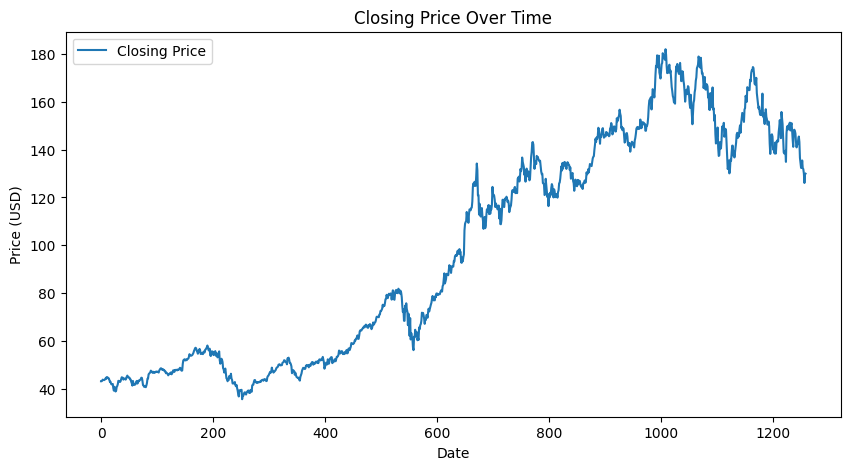

Data after cleaning:
                                     Date       Open       High        Low  \
1970-01-01 00:00:00.000000000 2018-01-02  42.540001  43.075001  42.314999   
1970-01-01 00:00:00.000000001 2018-01-03  43.132500  43.637501  42.990002   
1970-01-01 00:00:00.000000002 2018-01-04  43.134998  43.367500  43.020000   
1970-01-01 00:00:00.000000003 2018-01-05  43.360001  43.842499  43.262501   
1970-01-01 00:00:00.000000004 2018-01-08  43.587502  43.902500  43.482498   

                                   Close  Adj Close     Volume  
1970-01-01 00:00:00.000000000  43.064999  40.568932  102223600  
1970-01-01 00:00:00.000000001  43.057499  40.561863  118071600  
1970-01-01 00:00:00.000000002  43.257500  40.750271   89738400  
1970-01-01 00:00:00.000000003  43.750000  41.214241   94640000  
1970-01-01 00:00:00.000000004  43.587502  41.061150   82271200  
Data saved to Data/AAPL_historical_data.csv


C:\Users\aless\AppData\Local\Temp\ipykernel_11520\954346394.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)
C:\Users\aless\AppData\Local\Temp\ipykernel_11520\954346394.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='bfill', inplace=True)


In [43]:
def main():
    # Parameters for data collection
    ticker = 'AAPL'  # Apple Inc.
    start_date = '2018-01-01'  # Start date (5 years of data)
    end_date = '2023-01-01'    # End date

    # Step 2: Collect stock data
    stock_data = collect_stock_data(ticker, start_date, end_date)

    # Step 3: Inspect stock data
    inspect_stock_data(stock_data)

    # Step 4: Clean stock data
    cleaned_data = clean_stock_data(stock_data)

    # Step 5: Save the cleaned data
    save_stock_data(cleaned_data, ticker)

# Run the main function
if __name__ == "__main__":
    main()

### Visualize and Compute Technical Indicators

In [44]:
def inspect_and_analyze_data(stock_data):
    """
    Inspect and analyze the stock data by visualizing price trends and computing technical indicators.

    Parameters:
        stock_data (pd.DataFrame): Historical stock data to inspect and analyze
    """

    # Calculate SMAs
    stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['MA200'] = stock_data['Close'].rolling(window=200).mean()
    
    # Step 2: Calculate and Plot Moving Averages (MA)
    stock_data['EMA20'] = talib.EMA(stock_data['Close'], timeperiod=20)
    stock_data['EMA50'] = talib.EMA(stock_data['Close'], timeperiod=50)
    
    # Step 3: Calculate and Plot Bollinger Bands (Volatility)
    stock_data['BB_upper'], stock_data['BB_middle'], stock_data['BB_lower'] = talib.BBANDS(
        stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)
    
    # Step 4: Calculate and Plot Relative Strength Index (RSI)
    stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
    
    # Add Stochastic Oscillator
    stock_data['slowk'], stock_data['slowd'] = talib.STOCH(
    stock_data['High'], stock_data['Low'], stock_data['Close'], fastk_period=14, slowk_period=3, slowd_period=3)

    # Step 5: Calculate and Plot Moving Average Convergence Divergence (MACD)
    macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    stock_data['MACD_Hist'] = macdhist
    
    # ATR
    stock_data['ATR'] = talib.ATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14)

    # ADX
    stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14)

    # OBV (On-Balance Volume)
    stock_data['OBV'] = talib.OBV(stock_data['Close'], stock_data['Volume'])

    # Chaikin Money Flow (CMF)
    stock_data['CMF'] = ((stock_data['Close'] - stock_data['Low']) - (stock_data['High'] - stock_data['Close'])) / (stock_data['High'] - stock_data['Low']) * stock_data['Volume']
    stock_data['CMF'] = stock_data['CMF'].rolling(window=20).mean()
    
    # Step 6: Inspect basic statistics
    print("Basic Statistics of Stock Data:\n", stock_data.describe())

In [45]:
def get_fundamental_data(ticker):
    """
    Fetch the most recent fundamental data for the ticker (e.g., quarterly updates).
    """
    stock = yf.Ticker(ticker)
    fundamentals = stock.info
    
    fundamental_data = {
        'P/E Ratio': fundamentals.get('trailingPE'),
        'EPS': fundamentals.get('trailingEps'),
        'Dividend Yield': fundamentals.get('dividendYield'),
        'Price-to-Book': fundamentals.get('priceToBook'),
        'Market Cap': fundamentals.get('marketCap'),
        'Revenue': fundamentals.get('totalRevenue'),
        'Net Income': fundamentals.get('netIncomeToCommon')
    }
    return fundamental_data

In [46]:
def fuse_price_and_fundamental_data(price_data, fundamental_data):
    """
    Add fundamental data to the daily price data DataFrame, so every row has the same fundamental values.
    """
    # Convert the fundamental data dictionary into a DataFrame with the same index as the price data
    fundamentals_df = pd.DataFrame([fundamental_data] * len(price_data), index=price_data.index)
    
    # Concatenate the price data and fundamental data
    fused_data = pd.concat([price_data, fundamentals_df], axis=1)
    
    return fused_data

# Example: Fetch daily price data and quarterly fundamental data
ticker = 'AAPL'
start_date = '2024-06-26'
end_date = '2024-09-26'

# Step 1: Fetch daily price data
price_data = collect_stock_data(ticker, start_date, end_date)

# Step 2: Fetch quarterly fundamental data (latest available)
fundamental_data = get_fundamental_data(ticker)

# Step 3: Fuse daily price data with fundamental data
fused_data = fuse_price_and_fundamental_data(price_data, fundamental_data)

print("Fused Data:\n", fused_data)

C:\Users\aless\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Fused Data:
          Date        Open        High         Low       Close   Adj Close  \
0  2024-06-26  211.500000  214.860001  210.639999  213.250000  213.003448   
1  2024-06-27  214.690002  215.740005  212.350006  214.100006  213.852478   
2  2024-06-28  215.770004  216.070007  210.300003  210.619995  210.376480   
3  2024-07-01  212.089996  217.509995  211.919998  216.750000  216.499405   
4  2024-07-02  216.149994  220.380005  215.100006  220.270004  220.015335   
..        ...         ...         ...         ...         ...         ...   
59 2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
60 2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
61 2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
62 2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
63 2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   

       Volume  P/E Ratio   EPS  Dividend Yield  Price-to-Book 

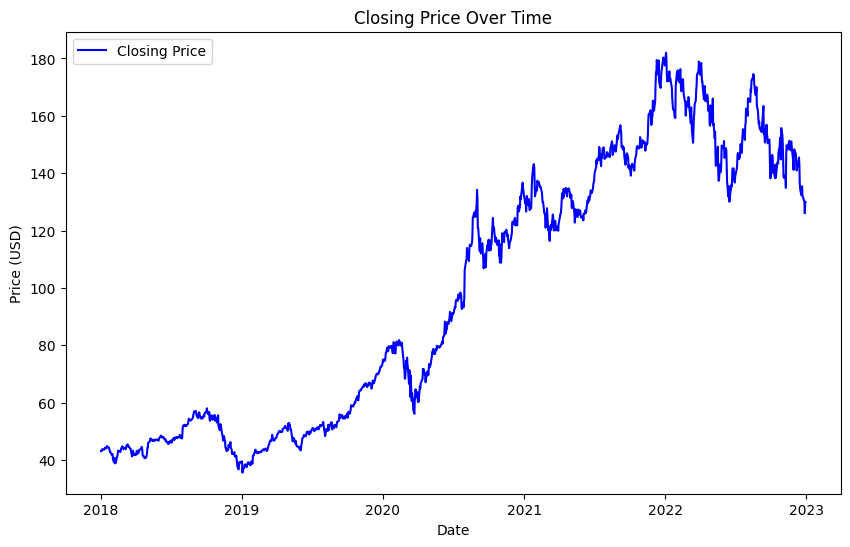

NameError: name 'talib' is not defined

In [10]:
# Assuming you have already collected stock data using the previous steps
stock_data = pd.read_csv('Data/AAPL_historical_data.csv', index_col='Date', parse_dates=True)

# Call the function to inspect and analyze the data
inspect_and_analyze_data(stock_data)

In [49]:
def get_fred_data(series_id, api_key):
    """
    Fetch macroeconomic data from FRED.
    """
    url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json'
    response = requests.get(url)
    data = response.json()['observations']
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['value'] = pd.to_numeric(df['value'])
    return df

def get_vix_data(start_date, end_date):
    """
    Fetch VIX (Volatility Index) data from Yahoo Finance.
    """
    vix_data = yf.download('^VIX', start=start_date, end=end_date)
    return vix_data

def get_oil_prices_data(start_date, end_date):
    """
    Fetch WTI Crude Oil Prices from Yahoo Finance.
    """
    oil_data = yf.download('CL=F', start=start_date, end=end_date)
    return oil_data

# Example usage for FRED and Yahoo Finance:
api_key = 'your_fred_api_key'

# Interest rates (10-year Treasury Yield)
treasury_yield_df = get_fred_data('DGS10', api_key)

# Inflation rate (CPI)
inflation_rate_df = get_fred_data('CPIAUCSL', api_key)

# Unemployment rate
unemployment_rate_df = get_fred_data('UNRATE', api_key)

# GDP growth rate
gdp_growth_df = get_fred_data('A191RL1Q225SBEA', api_key)

# VIX (Volatility Index)
vix_data = get_vix_data('2010-01-01', '2023-01-01')

# Oil prices (WTI Crude Oil)
oil_data = get_oil_prices_data('2010-01-01', '2023-01-01')

KeyError: 'observations'

In [ ]:
def forward_fill_macro_data(macro_data):
    """
    Forward-fill macroeconomic data for daily alignment.
    """
    return macro_data.reindex(pd.date_range(macro_data.index.min(), macro_data.index.max(), freq='D')).ffill()

# Forward fill the macroeconomic data
treasury_yield_df = forward_fill_macro_data(treasury_yield_df)
inflation_rate_df = forward_fill_macro_data(inflation_rate_df)
unemployment_rate_df = forward_fill_macro_data(unemployment_rate_df)
gdp_growth_df = forward_fill_macro_data(gdp_growth_df)
vix_data = forward_fill_macro_data(vix_data)
oil_data = forward_fill_macro_data(oil_data)

In [ ]:
def merge_macro_with_stock(fused_data, macro_data, column_name):
    """
    Merge a single macroeconomic dataset with the stock data.
    
    Parameters:
        fused_data (pd.DataFrame): The historical stock and fundamental dataset.
        macro_data (pd.DataFrame): The macroeconomic data to merge.
        column_name (str): Name for the new column in the merged dataset.
        
    Returns:
        pd.DataFrame: Fused dataset with the macroeconomic data added.
    """
    # Ensure macro data has the correct column name for merging
    macro_data = macro_data.rename(columns={'value': column_name})
    
    # Merge macro data with stock data on the index (date)
    merged_data = pd.merge(fused_data, macro_data[[column_name]], how='left', left_index=True, right_index=True)
    
    return merged_data

# Merge each macroeconomic dataset
fused_data = merge_macro_with_stock(fused_data, treasury_yield_df, 'Interest_Rates')
fused_data = merge_macro_with_stock(fused_data, inflation_rate_df, 'Inflation_Rate')
fused_data = merge_macro_with_stock(fused_data, unemployment_rate_df, 'Unemployment_Rate')
fused_data = merge_macro_with_stock(fused_data, gdp_growth_df, 'GDP_Growth')
fused_data = merge_macro_with_stock(fused_data, vix_data['Close'], 'VIX')  # VIX data comes from Yahoo Finance
fused_data = merge_macro_with_stock(fused_data, oil_data['Close'], 'Oil_Prices')  # Oil data from Yahoo Finance

# Show the final merged dataset with stock, fundamental, and macro data
print(fused_data.head())

In [ ]:
def calculate_fibonacci_levels(df, window=100):
    """
    Calculate Fibonacci retracement levels based on the high and low points over a rolling window.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing stock price data.
        window (int): Rolling window size (e.g., 100 days).
    
    Returns:
        pd.DataFrame: DataFrame with Fibonacci levels (23.6%, 38.2%, 50%, 61.8%, 100%) for each day.
    """
    high = df['High'].rolling(window=window).max()
    low = df['Low'].rolling(window=window).min()
    
    # Fibonacci retracement levels
    fib_236 = high - 0.236 * (high - low)
    fib_382 = high - 0.382 * (high - low)
    fib_50 = high - 0.5 * (high - low)
    fib_618 = high - 0.618 * (high - low)
    fib_100 = high
    
    fib_df = pd.DataFrame({
        'Fib_23.6%': fib_236,
        'Fib_38.2%': fib_382,
        'Fib_50%': fib_50,
        'Fib_61.8%': fib_618,
        'Fib_100%': fib_100
    }, index=df.index)
    
    return fib_df

# Example usage for calculating Fibonacci levels over a 100-day window
fibonacci_levels_df = calculate_fibonacci_levels(fused_data, window=100)

# Merge the Fibonacci levels into the fused dataset
fused_data = pd.concat([fused_data, fibonacci_levels_df], axis=1)

print(fused_data[['Close', 'Fib_23.6%', 'Fib_38.2%', 'Fib_50%', 'Fib_61.8%', 'Fib_100%']].head())